In [1]:
#LETS WORK WITH CIFAR 10 DATA 

#ABOUT CIFAR 10 

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

#How to get Images 

 we have  a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

 

In [2]:
#STEP 1 : LOAD CIFAR 10 DATA

In [3]:
#SECTION1 REQUIRED LIBRARY 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from drive.MyDrive.SOLUTION_PART_02.utils import Dataloader
from drive.MyDrive.SOLUTION_PART_02.utils import show_images
from drive.MyDrive.SOLUTION_PART_02.utils import classcount
from drive.MyDrive.SOLUTION_PART_02.utils import GetModel
from drive.MyDrive.SOLUTION_PART_02.utils import plot_misclassified_image
from drive.MyDrive.SOLUTION_PART_02.utils import perClassResult
from drive.MyDrive.SOLUTION_PART_02.utils import train
from drive.MyDrive.SOLUTION_PART_02.utils import test

In [4]:
#DOWNLOAD THE IMAGES 

class Args:

    # Data Loading
    # ============

    # train_batch_size = 64
    # val_batch_size = 64
    num_workers = 4
    batch_size = 128


    # Regularization
    # ==============
    #dropout = 0.1
    dropout = 0

    # Training
    # ========
    random_seed = 1
    epochs = 15
    learning_rate = 0.01
    momentum = 0.9


In [5]:
import torchvision
import torchvision.transforms as transforms
import torch
trainloader,testloader=Dataloader.train_test_loader(Args.batch_size,Args.num_workers)
classes = Dataloader.get_classes()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


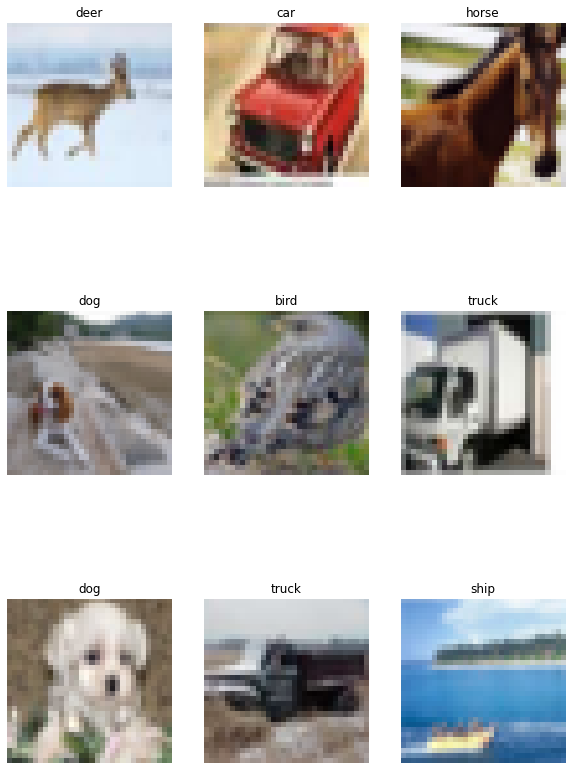

In [6]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,format='raw')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


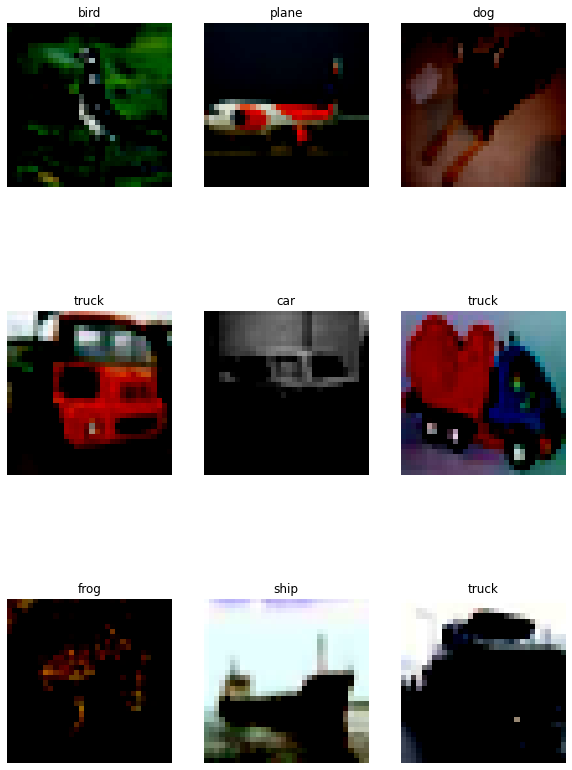

In [7]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,format='normalized')

In [8]:
class_count = classcount.get_train_class_count(classes)
print(class_count)

Files already downloaded and verified
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = Net().to(device) 
model = GetModel.Net().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,080
           Conv2d-11           [-1, 32, 16, 16]           9,248
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1

In [10]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
#criterion = nn.CrossEntropyLoss()
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [11]:
#Test
EPOCHS = 15

trainer = train.Trainer()
tester  = test.Tester()

for epoch in range(EPOCHS):
  print("EPOCH:", epoch, "last LR=",scheduler.get_last_lr(), "LR = ", scheduler.get_lr())
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, 5e-4)
  scheduler.step()
  tester.test(model, device, testloader)



test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=2.1787872314453125 Batch_id=390 Accuracy=51.72: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.8492, Test Accuracy: 5949/10000 (59.49%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.967663288116455 Batch_id=390 Accuracy=66.04: 100%|██████████| 391/391 [00:17<00:00, 22.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.6448, Test Accuracy: 6570/10000 (65.70%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.5708332061767578 Batch_id=390 Accuracy=69.81: 100%|██████████| 391/391 [00:17<00:00, 22.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.1956, Test Accuracy: 6879/10000 (68.79%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.5832664966583252 Batch_id=390 Accuracy=71.59: 100%|██████████| 391/391 [00:17<00:00, 22.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.0684, Test Accuracy: 6978/10000 (69.78%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.6938519477844238 Batch_id=390 Accuracy=73.05: 100%|██████████| 391/391 [00:17<00:00, 22.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.8639, Test Accuracy: 6989/10000 (69.89%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.4751482009887695 Batch_id=390 Accuracy=73.57: 100%|██████████| 391/391 [00:17<00:00, 22.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.2120, Test Accuracy: 6771/10000 (67.71%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=1.1929254531860352 Batch_id=390 Accuracy=80.67: 100%|██████████| 391/391 [00:16<00:00, 23.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.9980, Test Accuracy: 7967/10000 (79.67%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=1.0402867794036865 Batch_id=390 Accuracy=82.61: 100%|██████████| 391/391 [00:16<00:00, 23.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.1253, Test Accuracy: 8032/10000 (80.32%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.9567912817001343 Batch_id=390 Accuracy=83.65: 100%|██████████| 391/391 [00:16<00:00, 23.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.3572, Test Accuracy: 8024/10000 (80.24%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=1.1398226022720337 Batch_id=390 Accuracy=83.98: 100%|██████████| 391/391 [00:16<00:00, 23.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.2793, Test Accuracy: 8075/10000 (80.75%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.832931637763977 Batch_id=390 Accuracy=84.43: 100%|██████████| 391/391 [00:16<00:00, 23.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.4976, Test Accuracy: 8075/10000 (80.75%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.9909155368804932 Batch_id=390 Accuracy=84.87: 100%|██████████| 391/391 [00:16<00:00, 23.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.4421, Test Accuracy: 8025/10000 (80.25%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.86382657289505 Batch_id=390 Accuracy=87.60: 100%|██████████| 391/391 [00:16<00:00, 23.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6809, Test Accuracy: 8193/10000 (81.93%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.9742168188095093 Batch_id=390 Accuracy=88.22: 100%|██████████| 391/391 [00:16<00:00, 23.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.7113, Test Accuracy: 8234/10000 (82.34%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.8707322478294373 Batch_id=390 Accuracy=88.64: 100%|██████████| 391/391 [00:16<00:00, 23.03it/s]



Test set: Average loss: -5.6978, Test Accuracy: 8227/10000 (82.27%)



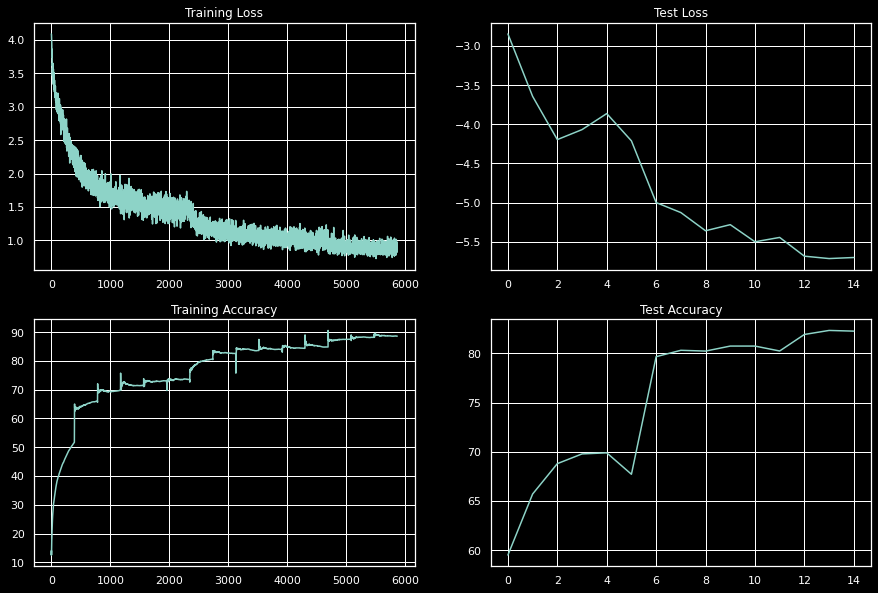

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("dark_background")

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()

In [13]:
#Save the model
torch.save(model,'./data/cifar')
#load the model
model = torch.load('./data/cifar')
model.eval()

Net(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0, inplace=False)
  )
  (transblock1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  )
  (convblock2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm

In [14]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

Accuracy of plane : 92 %
Accuracy of   car : 86 %
Accuracy of  bird : 76 %
Accuracy of   cat : 67 %
Accuracy of  deer : 87 %
Accuracy of   dog : 80 %
Accuracy of  frog : 85 %
Accuracy of horse : 96 %
Accuracy of  ship : 81 %
Accuracy of truck : 84 %


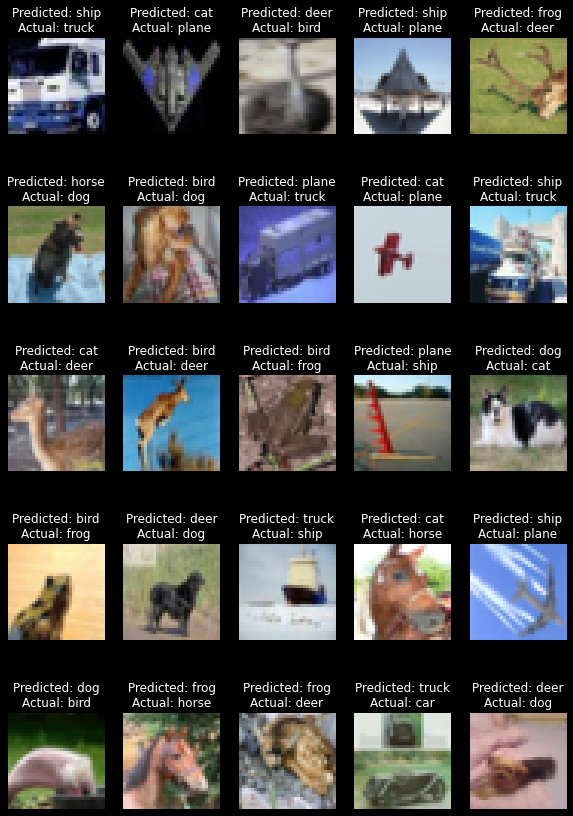

In [15]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes)

In [16]:
len(train_acc),len(train_losses)

(5865, 5865)